# Datenanalyse

In [ ]:
#Mit diesem Notebook haben wir Erkenntnisse aus den Daten gewonnen

In [5]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
PATH = '/data'

In [7]:
df_train = pd.read_csv('data/nlp_train.csv')
df_val = pd.read_csv('data/nlp_valid.csv')
df_test = pd.read_csv('data/test.csv')

In [8]:
print("From des Trainingsset: ", df_train.shape)
print("From des Validationsets: ", df_val.shape)
print("From des Testsets: ", df_test.shape)

From des Trainingsset:  (10908, 6)
From des Validationsets:  (1212, 6)
From des Testsets:  (5195, 5)


In [9]:
df_train.head()

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1


In [10]:
#Wir wollen die Verteilung der Sprachen in den Sets anschauen

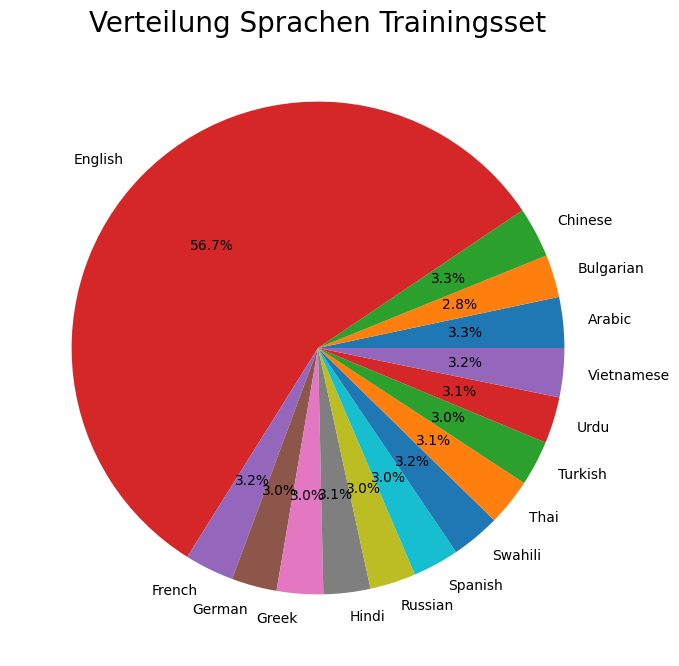

In [11]:
labels, frequencies = np.unique(df_train.language.values, return_counts = True)

plt.figure(figsize = (8,8))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.title("Verteilung Sprachen Trainingsset", fontsize=20)
plt.show()

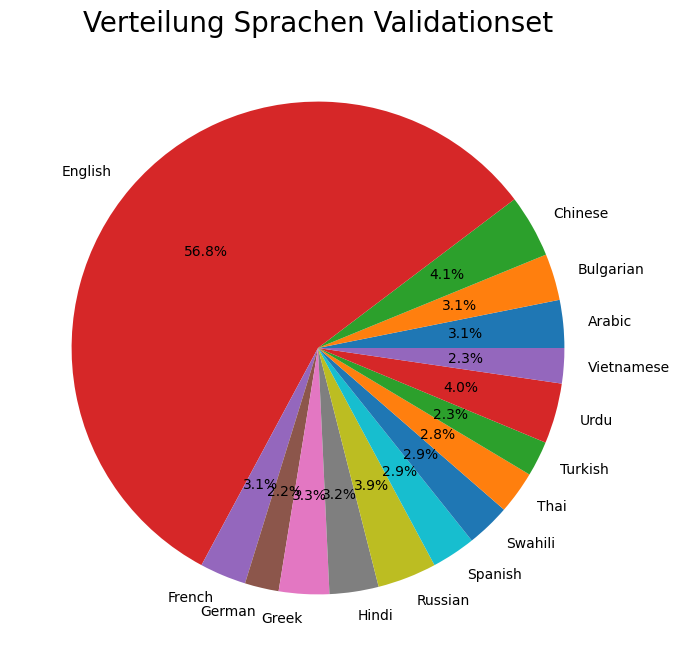

In [12]:
labels, frequencies = np.unique(df_val.language.values, return_counts = True)

plt.figure(figsize = (8,8))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.title("Verteilung Sprachen Validationset", fontsize=20)
plt.show()

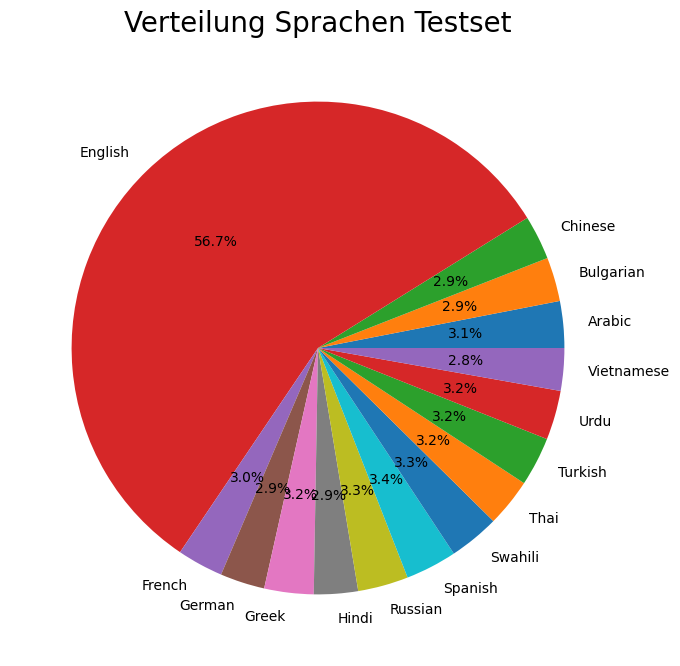

In [13]:
labels, frequencies = np.unique(df_test.language.values, return_counts = True)

plt.figure(figsize = (8,8))
plt.pie(frequencies,labels = labels, autopct = '%1.1f%%')
plt.title("Verteilung Sprachen Testset", fontsize=20)
plt.show()

In [14]:
#Die Verteilung der Labels ist ebenfalls interessant

Text(0, 0.5, 'Anzahl')

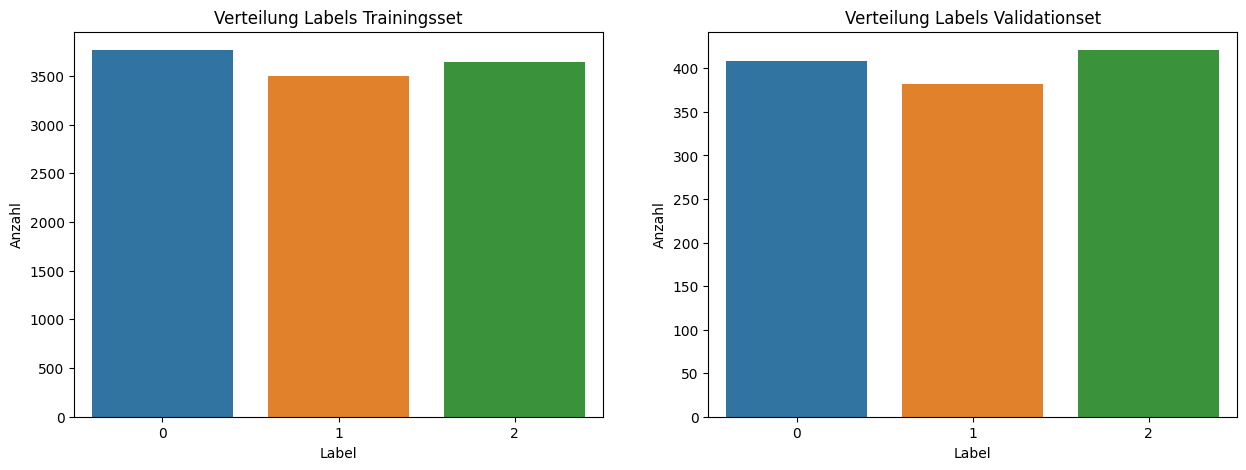

In [15]:
fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Verteilung Labels Trainingsset')
sns.countplot(data = df_train, x = 'label')
plt.xlabel("Label")
plt.ylabel("Anzahl")

plt.subplot(1,2,2)
plt.title('Verteilung Labels Validationset')
sns.countplot(data = df_val, x = 'label')
plt.xlabel("Label")
plt.ylabel("Anzahl")

In [16]:
#Nun wollten wir die Länge der Prämissen und Hypothesen herausfinden

In [17]:
def word_count(dataset, column):
    len_vector = []
    for text in dataset[column]:
        len_vector.append(len(text.split()))
    
    return len_vector

train_premise = word_count(df_train, 'premise')
train_hypothesis = word_count(df_train, 'hypothesis')

val_premise = word_count(df_val, 'premise')
val_hypothesis = word_count(df_val, 'hypothesis')

In [18]:
train_premise = np.array(train_premise)

In [19]:
np.median(train_premise)

16.0

Text(0, 0.5, 'Häufigkeit')

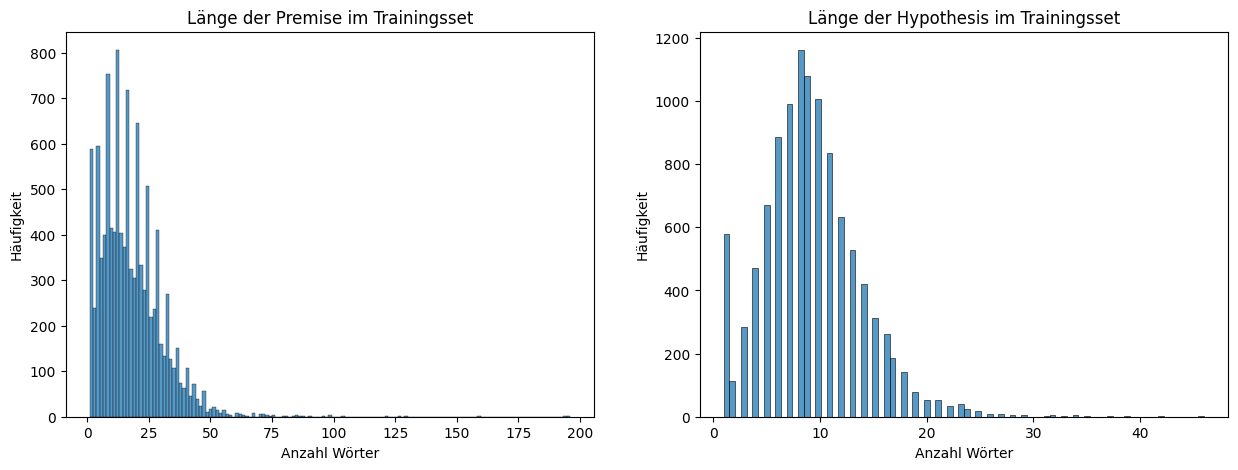

In [20]:
fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Länge der Premise im Trainingsset")
sns.histplot(train_premise)
plt.xlabel("Anzahl Wörter")
plt.ylabel("Häufigkeit")

plt.subplot(1,2,2)
plt.title("Länge der Hypothesis im Trainingsset")
sns.histplot(train_hypothesis)
plt.xlabel("Anzahl Wörter")
plt.ylabel("Häufigkeit")

In [21]:
#Uns stellt sich die Frage, ob die Labels auch für alle Sprachen gleichmässig verteilt sind

Text(0, 0.5, 'Anzahl')

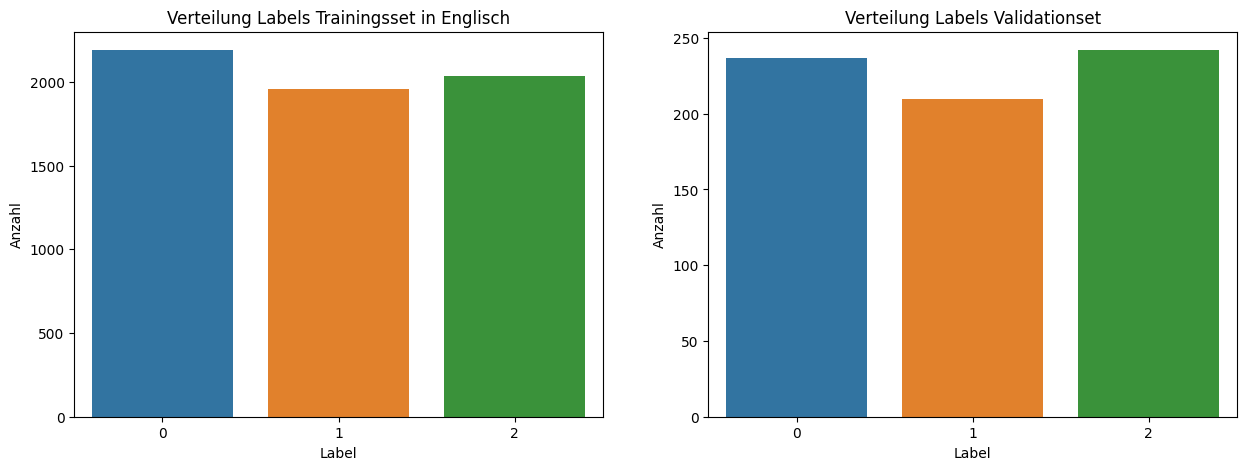

In [22]:
fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Verteilung Labels Trainingsset in Englisch')
sns.countplot(data = df_train[df_train.lang_abv == 'en'], x = 'label')
plt.xlabel("Label")
plt.ylabel("Anzahl")

plt.subplot(1,2,2)
plt.title('Verteilung Labels Validationset')
sns.countplot(data = df_val[df_val.lang_abv == 'en'], x = 'label')
plt.xlabel("Label")
plt.ylabel("Anzahl")

Text(0, 0.5, 'Anzahl')

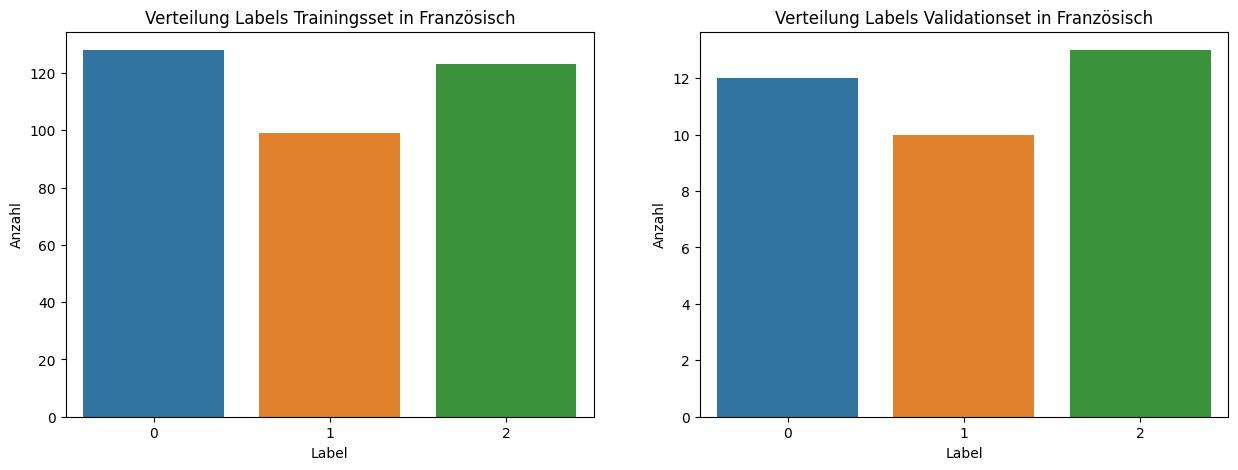

In [23]:
fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Verteilung Labels Trainingsset in Französisch')
sns.countplot(data = df_train[df_train.lang_abv == 'sw'], x = 'label')
plt.xlabel("Label")
plt.ylabel("Anzahl")

plt.subplot(1,2,2)
plt.title('Verteilung Labels Validationset in Französisch')
sns.countplot(data = df_val[df_val.lang_abv == 'sw'], x = 'label')
plt.xlabel("Label")
plt.ylabel("Anzahl")

Text(0, 0.5, 'Anzahl')

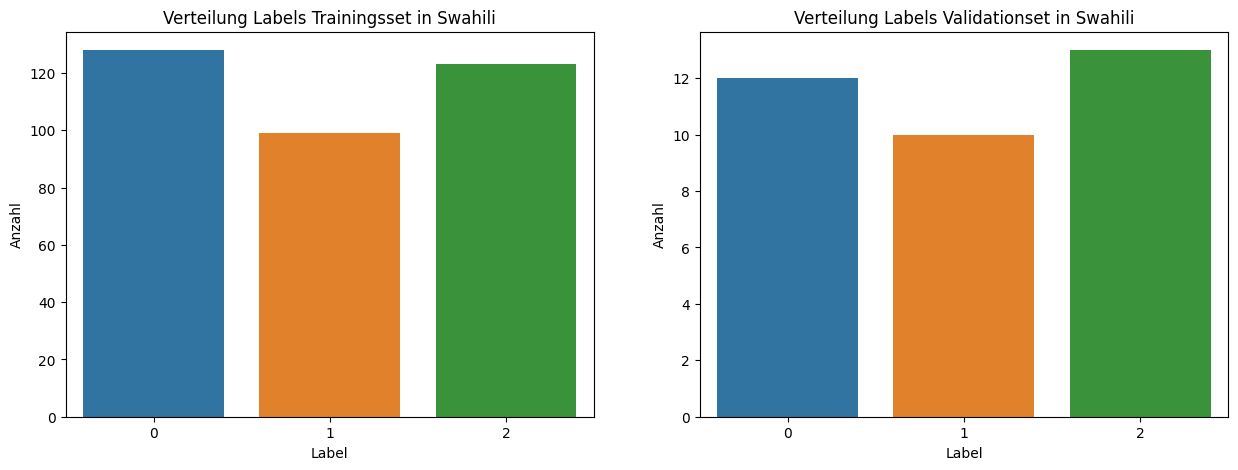

In [24]:
fig = plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Verteilung Labels Trainingsset in Swahili')
sns.countplot(data = df_train[df_train.lang_abv == 'sw'], x = 'label')
plt.xlabel("Label")
plt.ylabel("Anzahl")

plt.subplot(1,2,2)
plt.title('Verteilung Labels Validationset in Swahili')
sns.countplot(data = df_val[df_val.lang_abv == 'sw'], x = 'label')
plt.xlabel("Label")
plt.ylabel("Anzahl")

In [25]:
#Gibt es Duplikate in den Datensets?

In [26]:
df_train.duplicated().any()

False

In [27]:
df_train.premise.duplicated().any()

True

In [28]:
df_train.premise.duplicated().sum()

3256

In [29]:
df_train.hypothesis.duplicated().any()

True

In [30]:
df_train.hypothesis.duplicated().sum()

1

In [31]:
df_train[df_train.hypothesis.duplicated(keep=False)]

,id,premise,hypothesis,lang_abv,language,label
3322,c8d46b08fb,I don't know.,I am not sure.,en,English,0
6086,7277f93383,Err...I don't know.,I am not sure.,en,English,0


In [32]:
#Einige Prämissen und Hypothesen wurden wiederverendet